## Project: Human skin detection based on color segmentation:

The objective of this project is to demonstrate how to detect human skin based on color space segmentation:

This is a pixelwise process, which involves the following steps: 

1. The RGB image value is converted to HSV color space:
   * Potential skin pixels are detected based on a simple thresholding operation:
     * HSV color space: 0<=H<=17 and 15<=S<=170 and 0<=V<=255
         

2. The RGB image value is converted to YCrCb color space:
   * Potential skin pixels are detected based on a simple thresholding operation:
     * YCbCr color space: 0<=Y<=255 and 135<=Cr<=180 and 85<=Cb<=135

3. The HSV and YCbCr skin segmentations are merged together to obtain a more accurate skin segmentation.
      
We shall implement and illustrate each of these steps below.
    

#### Author: Mohsen Ghazel (mghazel)
* Date: March 29th, 2021

### Step 1: Imports and global variables:

#### 1.1: Python imports:

In [33]:
#======================================================
# Python imports and environment setup
#======================================================
# opencv
import cv2
# numpy
import numpy as np
# matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# input/output OS
import os 

# date-time to show date and time
import datetime

# to display the figures in the notebook
%matplotlib inline

#------------------------------------------
# Test imports and display package versions
#------------------------------------------
# Testing the OpenCV version
print("OpenCV : ",cv2.__version__)
# Testing the numpy version
print("Numpy : ",np.__version__)

OpenCV :  4.5.1
Numpy :  1.19.2


#### 1.2: Global variables:

In [34]:
#------------------------------------------------------
# Global variales
#------------------------------------------------------
# The RGB image value is converted to HSV color space
# Potential skin pixels are detected based on a simple 
# thresholding operation:
#
# HSV colorspace: 0<=H<=17 and 15<=S<=170 and 0<=V<=255
#
#------------------------------------------------------
# H-channel thresholds:
#------------------------------------------------------
# The minimum H-value
H_MIN = 0
# The maximum H-value
H_MAX = 17
#------------------------------------------------------
# S-channel thresholds:
#------------------------------------------------------
# The minimum S-value
S_MIN = 15
# The maximum S-value
S_MAX = 170
#------------------------------------------------------
# V-channel thresholds:
#------------------------------------------------------
# The minimum V-value
V_MIN = 0
# The maximum V-value
V_MAX = 255

#------------------------------------------------------
# The RGB image value is converted to YCrCb color space
# Potential skin pixels are detected based on a simple 
# thresholding operation:
#
# YCbCr colorspace: 0<=Y<=255 and 135<=Cr<=180 and 85<=Cb<=135
#
#------------------------------------------------------
# Y-channel thresholds:
#------------------------------------------------------
# The minimum Y-value
Y_MIN = 0
# The maximum Y-value
Y_MAX = 255
#------------------------------------------------------
# -channel thresholds:
#------------------------------------------------------
# The minimum Cr-value
Cr_MIN = 135
# The maximum Cr-value
Cr_MAX = 180
#------------------------------------------------------
# Cb-channel thresholds:
#------------------------------------------------------
# The minimum Cb-value
Cb_MIN = 85
# The maximum V-value
Cb_MAX = 135

### Step 2: Input data
#### 2.1)  Read and visualize the input template image

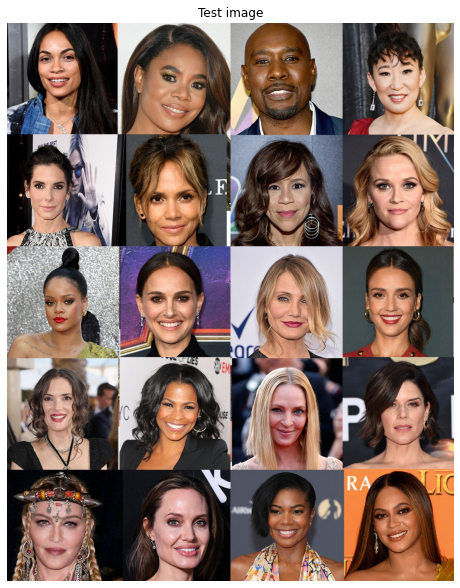

In [35]:
#----------------------------------------------------
# Read the test image:
#----------------------------------------------------
# template test file name
test_img_file_path = "../data/test-images/test-image-001.jpg"
# check if the teste image file exists
if(os.path.exists(test_img_file_path) == 0):
    print('Test image file name DOES NOT EXIST! = ' + template_img_file_path)
# Read the test image 
img = cv2.imread(test_img_file_path, cv2.IMREAD_COLOR)
# create a figure and set its axis
fig_size = (8, 12)
# create the figure 
plt.figure(figsize=fig_size)
# axis off
plt.axis('off')
# display the template image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
# set the title
plt.title('Test image', fontsize = 12)
# show the image
plt.show()                    

### Step 3: Detect Skin based on HSV Color space segmentation:

* The RGB image value is converted to HSV color space
  * Potential skin pixels are detected based on a simple thresholding operation:
    * HSV colorspace: 0<=H<=17 and 15<=S<=170 and 0<=V<=255

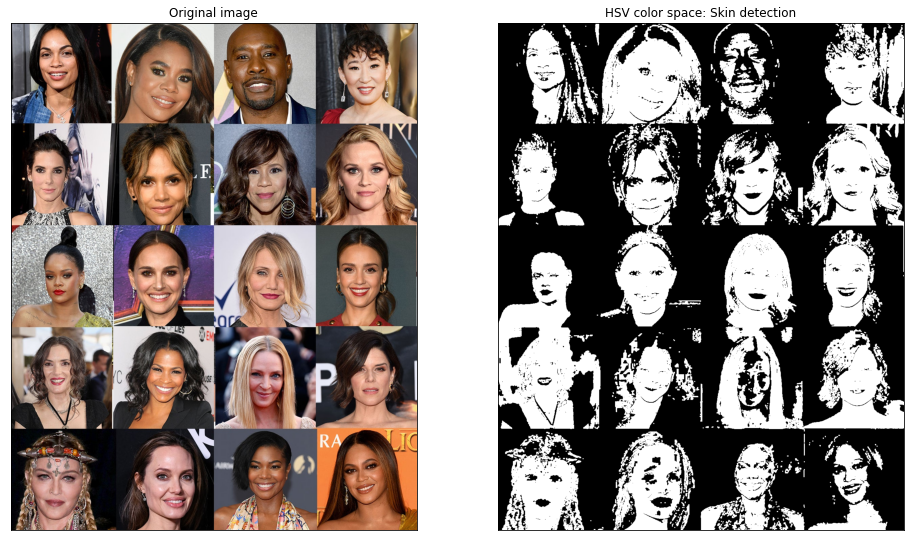

In [36]:
#------------------------------------------------------
# 3.1) Convert the input image from BGR to HSV color 
#      space
#------------------------------------------------------
img_HSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

#------------------------------------------------------
# 3.2) Apply the thresholding operations on the HSV color 
#      channels as specified above
#------------------------------------------------------
HSV_mask = cv2.inRange(img_HSV, (H_MIN, S_MIN, V_MIN), (H_MAX, S_MAX, V_MAX)) 

#------------------------------------------------------
# 3.3) Apply morphological operations to remove small 
#      disconnected detections
#------------------------------------------------------
HSV_mask = cv2.morphologyEx(HSV_mask, cv2.MORPH_OPEN, np.ones((3,3), np.uint8))

#------------------------------------------------------
# 3.4) Visualize the potential skin-segemntation based
#      on the HSV color space
#------------------------------------------------------
# create a figure
plt.figure(figsize=(16, 12))
# visualize the original image
plt.subplot(121)
plt.title("Original image", fontsize=12)
plt.xticks([]), plt.yticks([])
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
# The HSV skin detection
plt.subplot(122)
plt.title("HSV color space: Skin detection", fontsize=12)
plt.xticks([]), plt.yticks([])
plt.imshow(HSV_mask,  cmap='gray', vmin=0, vmax=255);

### Step 4: Detect Skin based on YCrCb Color space segmentation:

* The RGB image value is converted to YCrCb color space
  * Potential skin pixels are detected based on a simple thresholding operation:
    * YCbCr colorspace: 0<=Y<=255 and 135<=Cr<=180 and 85<=Cb<=135

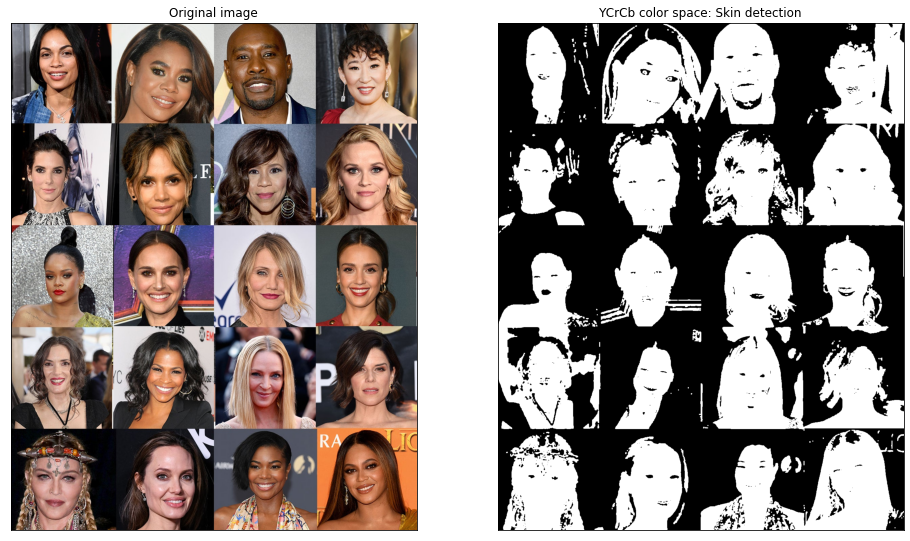

In [37]:
#------------------------------------------------------
# 4.1) Convert the input image from BGR to YCrCb color 
#      space
#------------------------------------------------------
img_YCrCb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)

#------------------------------------------------------
# 4.2) Apply the thresholding operations on the YCrCb color 
#      channels as specified above
#------------------------------------------------------
YCrCb_mask = cv2.inRange(img_YCrCb, (Y_MIN, Cr_MIN, Cb_MIN), (Y_MAX, Cr_MAX, Cb_MAX)) 

#------------------------------------------------------
# 4.3) Apply morphological operations to remove small 
#      disconnected detections
#------------------------------------------------------
YCrCb_mask = cv2.morphologyEx(YCrCb_mask, cv2.MORPH_OPEN, np.ones((3,3), np.uint8))

#------------------------------------------------------
# 4.4) Visualize the potential skin-segemntation based
#      on the YCrCb color space
#------------------------------------------------------
# create a figure
plt.figure(figsize=(16, 12))
# visualize the original image
plt.subplot(121)
plt.title("Original image", fontsize=12)
plt.xticks([]), plt.yticks([])
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
# The HSV skin detection
plt.subplot(122)
plt.title("YCrCb color space: Skin detection", fontsize=12)
plt.xticks([]), plt.yticks([])
plt.imshow(YCrCb_mask,  cmap='gray', vmin=0, vmax=255);

### Step 5: Combine the HSV and YCrCb Color space segmentations:

* Combine the HSV and YCrCb skin segmentation masks to obtain a final merged skin segmentation mask

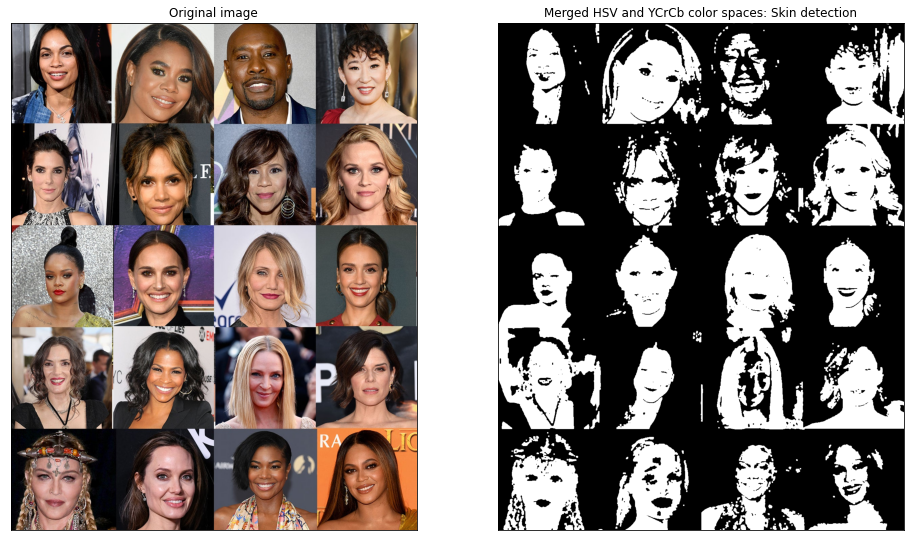

In [38]:
#------------------------------------------------------
# 5.1) Merge the HSV and YCrCb skin masks together:
#------------------------------------------------------
merged_mask=cv2.bitwise_and(YCrCb_mask,HSV_mask)
#------------------------------------------------------
# 5.2) Post-process the moerged mask to reduce noise
#------------------------------------------------------
merged_mask=cv2.medianBlur(merged_mask,3)
#------------------------------------------------------
# 5.3) Apply morphological operations to remove small 
#      disconnected detections
#------------------------------------------------------
merged_mask = cv2.morphologyEx(merged_mask, cv2.MORPH_OPEN, np.ones((4,4), np.uint8))

#------------------------------------------------------
# 5.4) Visualize the final merged skin detection results
#------------------------------------------------------
# create a figure
plt.figure(figsize=(16, 12))
# visualize the original image
plt.subplot(121)
plt.title("Original image", fontsize=12)
plt.xticks([]), plt.yticks([])
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
# The HSV skin detection
plt.subplot(122)
plt.title("Merged HSV and YCrCb color spaces: Skin detection", fontsize=12)
plt.xticks([]), plt.yticks([])
plt.imshow(merged_mask,  cmap='gray', vmin=0, vmax=255);


### Step 6: Display a successful execution message

In [32]:
# display a final message
# current time
now = datetime.datetime.now()
# display a message
print('Program executed successfully on: '+ str(now.strftime("%Y-%m-%d %H:%M:%S") + "...Goodbye!\n"))

Program executed successfully on: 2021-04-14 10:32:54...Goodbye!

